##### Importing basic libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##### Importing PyTorch libraries

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [34]:
ad_data = pd.read_csv("../../DATA/Advertising.csv",index_col= 0)
ad_data.head()

,TV,radio,newspaper,sales
CompID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [35]:
ad_train = ad_data.sample(frac=0.8, random_state=0)
ad_test = ad_data.drop(ad_data.index)

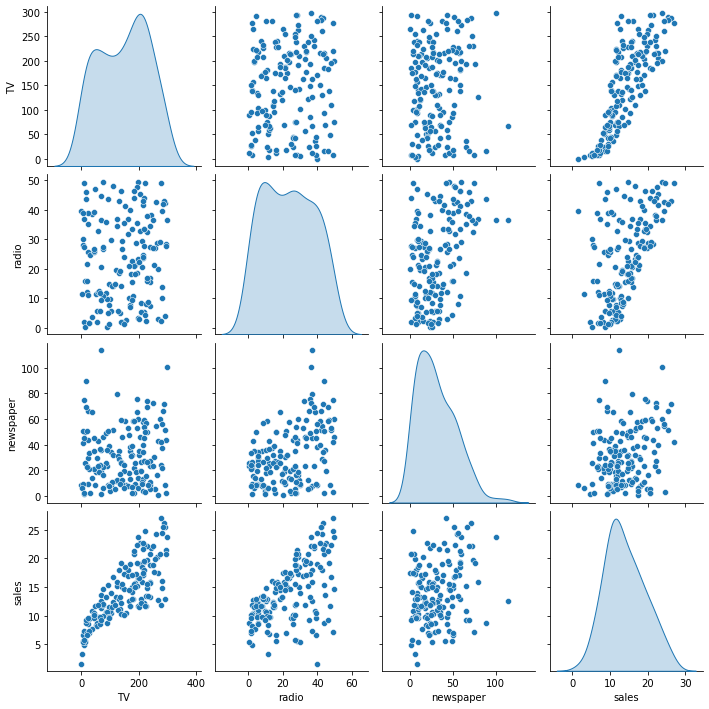

In [36]:
sns.pairplot(ad_train[['TV','radio','newspaper','sales']], diag_kind='kde')

In [37]:
ad_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
TV,160.0,146.878750,86.316062,0.7,68.850,154.05,217.025,296.4
radio,160.0,23.334375,14.528246,0.3,10.625,23.45,35.925,49.4
newspaper,160.0,31.211875,22.439631,0.3,12.200,26.30,46.050,114.0
sales,160.0,14.016875,5.281321,1.6,10.100,13.20,17.450,27.0


In [38]:
ad_train_features = ad_train.copy()
ad_test_features = ad_train.copy()

ad_train_labels = ad_train_features.pop('sales')
ad_test_labels = ad_test_features.pop('sales')

In [39]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(ad_train_features))
print(normalizer.mean.numpy())


[[146.87874   23.334377  31.211876]]


In [40]:
first = np.array(ad_train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[69.2 20.5 18.3]]

Normalized: [[-0.9  -0.2  -0.58]]


In [41]:
radio = np.array(ad_train_features['radio'])

radio_normalizer = layers.Normalization(input_shape=[1,], axis=None)
radio_normalizer.adapt(radio)

In [42]:
radio_model = tf.keras.Sequential([
    radio_normalizer,
    layers.Dense(units=1)
])

radio_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [43]:
radio_model.predict(radio[:10])


1/1 [==============================] - 0s 49ms/step


array([[-0.17164665],
       [-0.71062046],
       [-1.3949356 ],
       [ 1.1485363 ],
       [-0.94074416],
       [-1.0679177 ],
       [ 1.548225  ],
       [-0.97102356],
       [ 0.71251255],
       [-0.0020819 ]], dtype=float32)

In [44]:
radio_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [45]:
%%time
history = radio_model.fit(
    ad_train_features['radio'],
    ad_train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.04 s, sys: 225 ms, total: 3.26 s
Wall time: 3.33 s


In [46]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.249202,3.408546,95
96,3.249857,3.406834,96
97,3.247840,3.412804,97
98,3.257021,3.431052,98
99,3.252327,3.418077,99


In [47]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

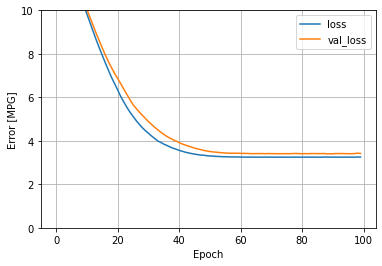

In [48]:
plot_loss(history)


In [ ]:
test_results = {}

test_results['radio_model'] = radio_model.evaluate(
    ad_test_features['radio_model'],
    ad_test_labels, verbose=0)

In [ ]:
tf.linspace()